In [67]:
import  pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
import os

In [ ]:
df =pd.read_csv("1719219914-Analysis of Super Store - DA (1).csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [69]:
print("The shape of the dataset is:", df.shape)

The shape of the dataset is: (9994, 13)


In [70]:
print("Numbers of rows are present in the dataset: ", df.shape[0])

Numbers of rows are present in the dataset:  9994


In [71]:
print("Numbers of columnss are present in the dataset: ", df.shape[1])

Numbers of columnss are present in the dataset:  13


In [72]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [73]:
print("Total No.of Nulls present in the dataset:",df.isnull().sum().sum())

Total No.of Nulls present in the dataset: 0


In [74]:
len(df)

9994

In [75]:
df_cleaned =df.drop_duplicates()

In [76]:
len(df_cleaned)

9977

<Axes: ylabel='Sales'>

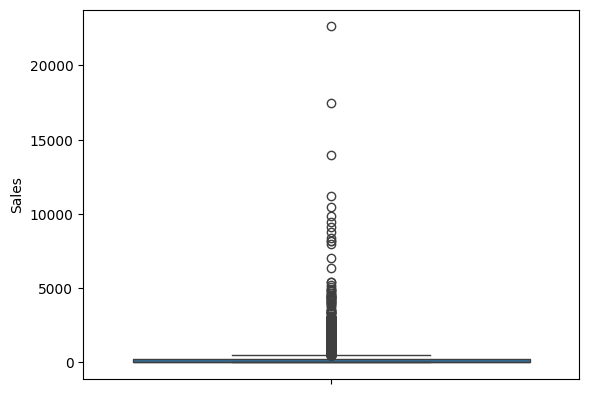

In [77]:
sns.boxplot(y='Sales', data=df)

In [78]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [79]:
def remove_outliers(col_name):
    sorted(col_name)
    Q1, Q3 = col_name.quantile([0.25,0.75])
    IQR = Q3 -Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper

low,high =remove_outliers(df['Sales'])

low, high

(-271.71000000000004, 498.93)

In [80]:
df['Sales']=np.where(df['Sales']>high, high,df['Sales'])

<Axes: ylabel='Sales'>

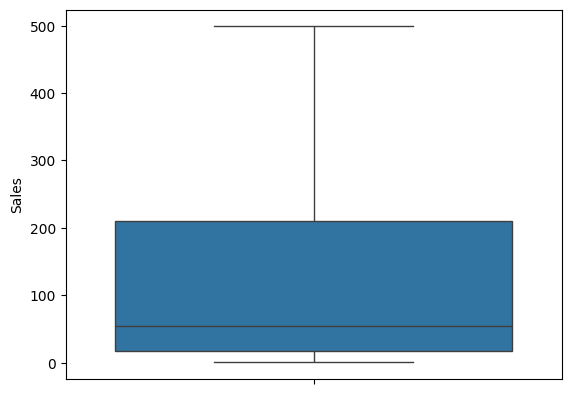

In [81]:
sns.boxplot(y='Sales',data=df)

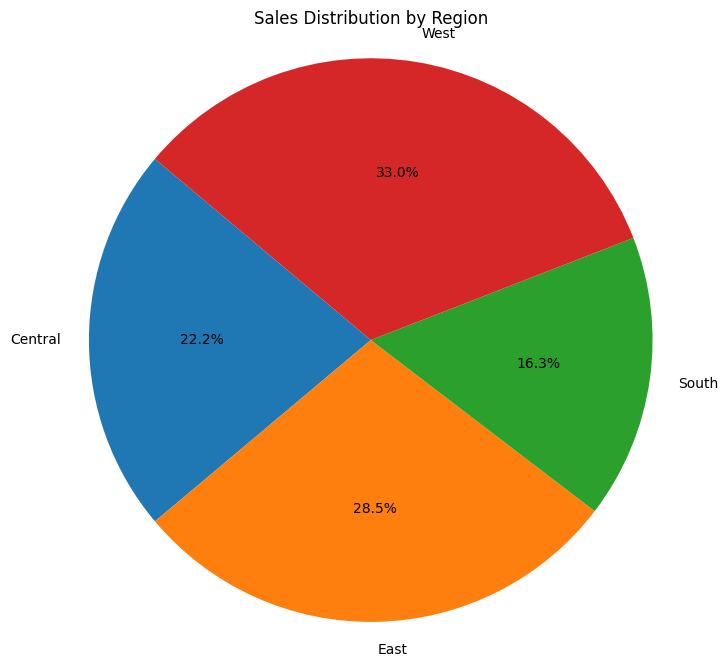

In [82]:
plt.figure(figsize=(8, 8))
region_sales = df.groupby('Region')['Sales'].sum()
plt.pie(region_sales, labels=region_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Sales Distribution by Region')
plt.axis('equal') 
plt.show()

###  Sales Distribution by Top 10 Cities using Pie Chart

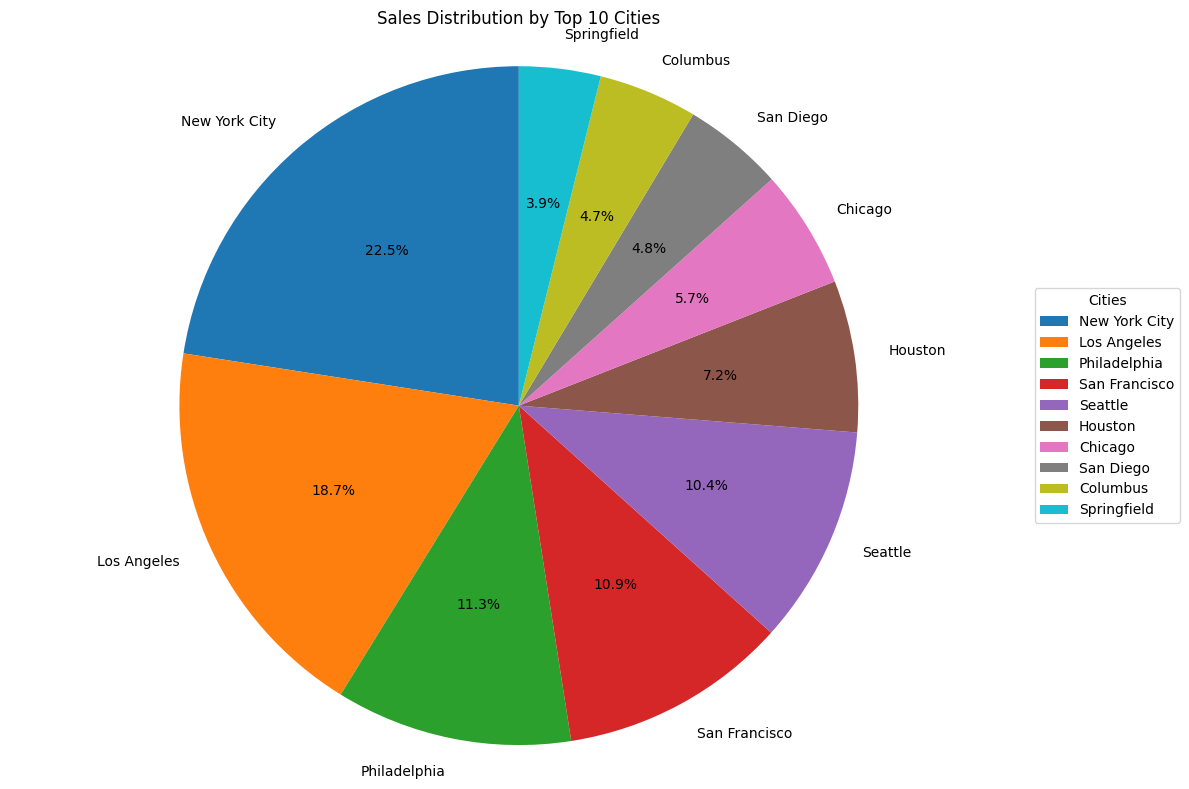

Sales Values for Top 10 Cities:
City
New York City    138187.63
Los Angeles      114443.51
Philadelphia      69043.60
San Francisco     66647.86
Seattle           63759.87
Houston           44286.56
Chicago           34685.04
San Diego         29412.27
Columbus          28822.44
Springfield       23808.13
Name: Sales, dtype: float64


In [83]:
top_10_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 8))
plt.pie(top_10_cities, labels=top_10_cities.index, autopct='%1.1f%%', startangle=90)
plt.title('Sales Distribution by Top 10 Cities')
plt.axis('equal')

# Add a legend
plt.legend(top_10_cities.index, title="Cities", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.tight_layout()
plt.show()

# Print the actual values for these cities
print("\
Sales Values for Top 10 Cities:")
print(top_10_cities.round(2))

In [84]:
df['Profit_Margin'] = (df['Profit'] / df['Sales']) * 100

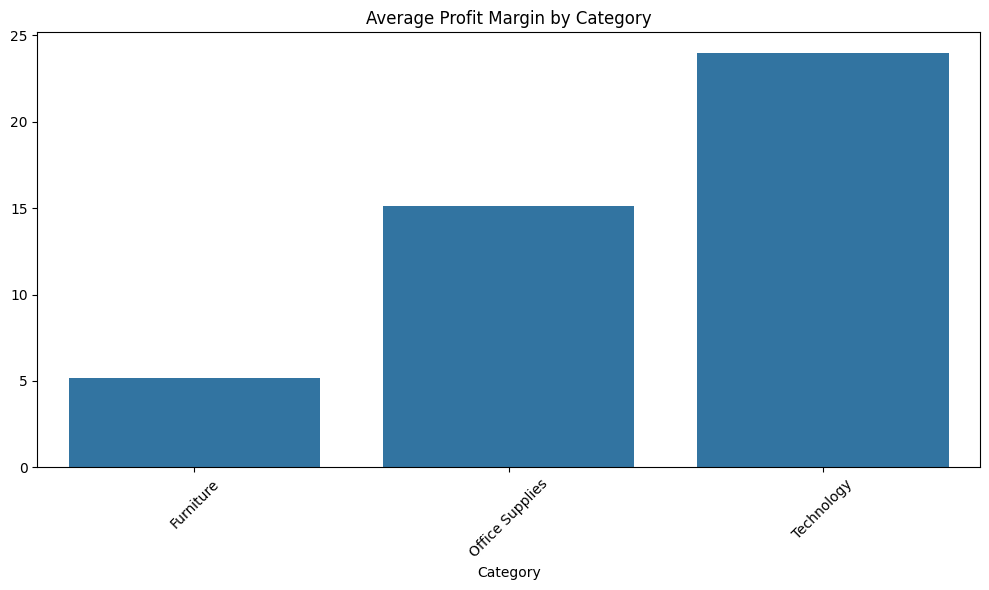

In [85]:
plt.figure(figsize=(10, 6))
category_margins = df.groupby('Category')['Profit_Margin'].mean()
sns.barplot(x=category_margins.index, y=category_margins.values)
plt.title('Average Profit Margin by Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

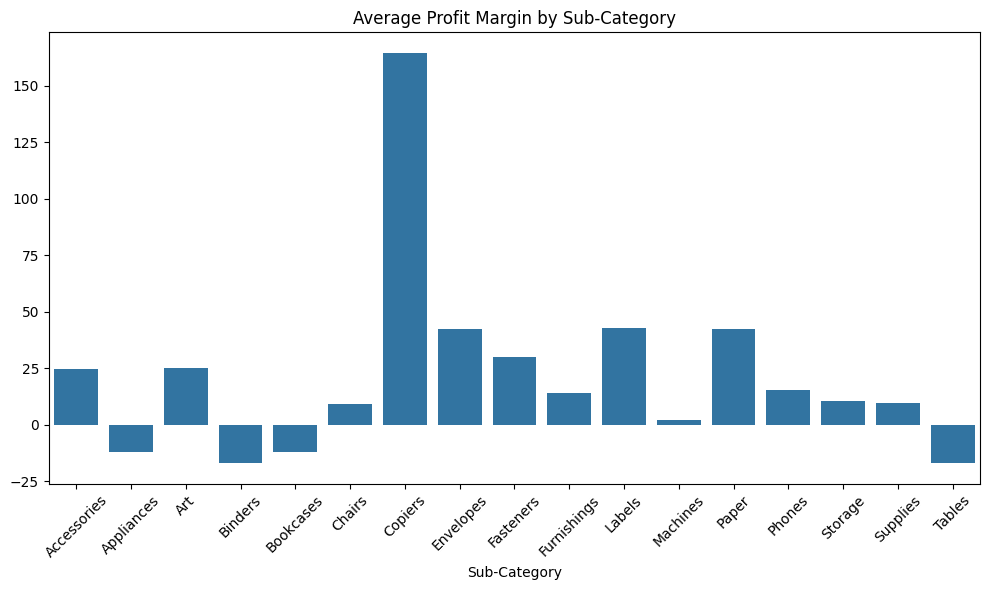

In [86]:
plt.figure(figsize=(10, 6))
category_margins = df.groupby('Sub-Category')['Profit_Margin'].mean()
sns.barplot(x=category_margins.index, y=category_margins.values)
plt.title('Average Profit Margin by Sub-Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [87]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Profit_Margin
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.960,2,0.00,41.9136,16.000000
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,498.930,3,0.00,219.5820,44.010583
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.620,2,0.00,6.8714,47.000000
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,498.930,5,0.45,-383.0310,-76.770489
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.368,2,0.20,2.5164,11.250000
